In [1]:
pip install tensorflow keras pickle nltk

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle
#intents_file = open('intents.json').read()

__Data Preparation__
In this study, we will use a housing dataset presented by De Cock (2011). This dataset describes
the sales of residential units in Ames, Iowa starting from 2006 until 2010. The dataset contains a
large number of variables that are involved in determining a house price. I obtained a csv copy
of the data from https://www.kaggle.com/prevek18/ames-housing-dataset.


__Data Description__
The dataset contains 2930 records (rows) and 82 features (columns).
Here, I give a brief description of dataset features. Due to the large number of features, I will Since the number of features I attach the original data description file to this paper for more information about
the dataset (It can be downloaded also from https://www.kaggle.com/c/house-prices-advancedregression-techniques/data).

In [3]:
import pandas as pd
import numpy as np

In [4]:
dataset = pd.read_csv("AmesHousing.csv")

In [5]:
dataset

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [6]:
# Configuring float numbers format
pd.options.display.float_format = '{:20.2f}'.format
dataset.head(n=5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Exploratory Data Analysis

In [7]:
#looking at numerical columns in our dataset

dataset.describe(include=[np.number], percentiles=[.5]).transpose().drop("count", axis=1)

,mean,std,min,50%,max
Order,1465.50,845.96,1.00,1465.50,2930.00
PID,714464496.99,188730844.65,526301100.00,535453620.00,1007100110.00
MS SubClass,57.39,42.64,20.00,50.00,190.00
Lot Frontage,69.22,23.37,21.00,68.00,313.00
Lot Area,10147.92,7880.02,1300.00,9436.50,215245.00
Overall Qual,6.09,1.41,1.00,6.00,10.00
Overall Cond,5.56,1.11,1.00,5.00,9.00
Year Built,1971.36,30.25,1872.00,1973.00,2010.00
Year Remod/Add,1984.27,20.86,1950.00,1993.00,2010.00
Mas Vnr Area,101.90,179.11,0.00,0.00,1600.00


In [8]:
dataset.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00,2930.00,2930.00,2440.00,2930.00,2930.00,2930.00,2930.00,2930.00,2907.00,...,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00
mean,1465.50,714464496.99,57.39,69.22,10147.92,6.09,5.56,1971.36,1984.27,101.90,...,93.75,47.53,23.01,2.59,16.00,2.24,50.64,6.22,2007.79,180796.06
std,845.96,188730844.65,42.64,23.37,7880.02,1.41,1.11,30.25,20.86,179.11,...,126.36,67.48,64.14,25.14,56.09,35.60,566.34,2.71,1.32,79886.69
min,1.00,526301100.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,12789.00
25%,733.25,528477022.50,20.00,58.00,7440.25,5.00,5.00,1954.00,1965.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,2007.00,129500.00
50%,1465.50,535453620.00,50.00,68.00,9436.50,6.00,5.00,1973.00,1993.00,0.00,...,0.00,27.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,160000.00
75%,2197.75,907181097.50,70.00,80.00,11555.25,7.00,6.00,2001.00,2004.00,164.00,...,168.00,70.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,213500.00
max,2930.00,1007100110.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,...,1424.00,742.00,1012.00,508.00,576.00,800.00,17000.00,12.00,2010.00,755000.00


We can see, that
Average lot area of the houses in our dataset is 10,147.92 ft2 
Standard deviation of 7,880.02 ft2. 
Minimum lot area is 1,300 ft2 and the maximum lot area is 215,245 ft2
Median of 9,436.5 ft2. 

In [9]:
#looking at non-numerical columns in our dataset

dataset.describe(include=[np.object], percentiles=[.5]).transpose().drop("count", axis=1)

<ipython-input-9-9836f40f6e9b>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.describe(include=[np.object], percentiles=[.5]).transpose().drop("count", axis=1)


,unique,top,freq
MS Zoning,7,RL,2273
Street,2,Pave,2918
Alley,2,Grvl,120
Lot Shape,4,Reg,1859
Land Contour,4,Lvl,2633
Utilities,3,AllPub,2927
Lot Config,5,Inside,2140
Land Slope,3,Gtl,2789
Neighborhood,28,NAmes,443
Condition 1,9,Norm,2522


In the table we got, 
unique represents the number of unique values, 
top represents the most frequent element, 
and freq represents the frequency of the most frequent element.

## Data Cleaning
### Dealing with Missing Values

In [10]:
# Getting the number of missing values in each column
num_missing = dataset.isna().sum()

In [11]:
num_missing

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [12]:
# Excluding columns that contains 0 missing values
num_missing = num_missing[num_missing > 0]

In [13]:
num_missing

Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

In [14]:
# Getting the percentages of missing values
percent_missing = num_missing * 100 / dataset.shape[0]

In [15]:
percent_missing

Lot Frontage                    16.72
Alley                           93.24
Mas Vnr Type                     0.78
Mas Vnr Area                     0.78
Bsmt Qual                        2.73
Bsmt Cond                        2.73
Bsmt Exposure                    2.83
BsmtFin Type 1                   2.73
BsmtFin SF 1                     0.03
BsmtFin Type 2                   2.76
BsmtFin SF 2                     0.03
Bsmt Unf SF                      0.03
Total Bsmt SF                    0.03
Electrical                       0.03
Bsmt Full Bath                   0.07
Bsmt Half Bath                   0.07
Fireplace Qu                    48.53
Garage Type                      5.36
Garage Yr Blt                    5.43
Garage Finish                    5.43
Garage Cars                      0.03
Garage Area                      0.03
Garage Qual                      5.43
Garage Cond                      5.43
Pool QC                         99.56
Fence                           80.48
Misc Feature

In [16]:
# Concatenating the number and perecentage of missing values into one dataframe and sorting it
pd.concat([num_missing, percent_missing], axis=1,
keys=['Missing Values', 'Percentage']).\
sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
Pool QC,2917,99.56
Misc Feature,2824,96.38
Alley,2732,93.24
Fence,2358,80.48
Fireplace Qu,1422,48.53
Lot Frontage,490,16.72
Garage Cond,159,5.43
Garage Qual,159,5.43
Garage Finish,159,5.43
Garage Yr Blt,159,5.43


For Pool QC: The table above shows that the percentage of missing values in Pool QC column is 99.56%.
This could mean that a missing value in this column denotes that the corresponding house doesn’t have
a pool. To verify this, let’s take a look at the values of Pool Area column:

In [17]:
dataset["Pool Area"].value_counts()

0      2917
144       1
228       1
368       1
444       1
480       1
512       1
576       1
648       1
738       1
800       1
519       1
555       1
561       1
Name: Pool Area, dtype: int64

This shows that 2917 entries in Pool Area column that have a value of 0. Which means that each house without a pool has a missing value in Pool QC column and a value of 0 in Pool Area column. 


In [18]:
#filling the missing values in Pool QC column with "No Pool":
dataset["Pool QC"].fillna("No Pool", inplace=True)

In [19]:
dataset

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00,31770,Pave,NaN,IR1,Lvl,...,0,No Pool,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,...,0,No Pool,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,...,0,No Pool,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00,11160,Pave,NaN,Reg,Lvl,...,0,No Pool,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,...,0,No Pool,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.00,7937,Pave,NaN,IR1,Lvl,...,0,No Pool,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,No Pool,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.00,10441,Pave,NaN,Reg,Lvl,...,0,No Pool,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.00,10010,Pave,NaN,Reg,Lvl,...,0,No Pool,NaN,NaN,0,4,2006,WD,Normal,170000


For Misc Feature: The percentage of missing values in Misc Feature column is 96.38%. 


In [20]:
dataset["Misc Val"].value_counts()

0        2827
400        18
500        13
450         9
600         8
2000        7
700         7
1500        3
1200        3
650         3
480         2
4500        2
3000        2
2500        2
420         1
1150        1
15500       1
455         1
6500        1
80          1
1512        1
8300        1
1400        1
1300        1
12500       1
1000        1
460         1
900         1
800         1
750         1
300         1
54          1
620         1
17000       1
350         1
560         1
490         1
3500        1
Name: Misc Val, dtype: int64

In [21]:
dataset['Misc Feature'].value_counts()

Shed    95
Gar2     5
Othr     4
Elev     1
TenC     1
Name: Misc Feature, dtype: int64

Misc Val column has 2827 entries with a value of 0. Misc Feature has 2824 missing values. Which means that we can say that each house without a “miscellaneous
feature” has a missing value in Misc Feature column and a value of 0 in Misc Val column. 

In [22]:
dataset['Misc Feature'].fillna('No feature', inplace=True)

Alley, Fence, and Fireplace Qu: According to the dataset documentation, NA in Alley, Fence, and Fireplace Qu columns denotes that the house doesn’t have an alley, fence, or fireplace. 

In [23]:
#filling in the missing values in these columns with "No Alley", "No Fence", and "No Fireplace"
dataset['Alley'].fillna('No Alley', inplace=True)
dataset['Fence'].fillna('No Fence', inplace=True)
dataset['Fireplace Qu'].fillna('No Fireplace', inplace=True)

Lot Frontage: Lot Frontage represents the linear feet of street connected to the house. So we assume that the missing values in this column indicates that the house is not connected to any street, and we fill in the missing values with 0:


In [24]:
dataset['Lot Frontage'].fillna(0, inplace=True)

Garage Cond, Garage Qual, Garage Finish, Garage Yr Blt, Garage Type, Garage Cars, and Garage Area: According to the dataset documentation, NA in Garage Cond, Garage Qual, Garage Finish, and Garage Type indicates that there is no garage in the house. So we fill in the missing values in these columns with "No Garage". We notice that Garage Cond, Garage Qual, Garage Finish, Garage Yr Blt columns have 159 missing values, but Garage Type has 157 and both Garage Cars and Garage Area have one missing value. Let’s take a look at the row that contains the missing value in Garage Cars:


In [25]:
garage_columns = [col for col in dataset.columns if col.startswith("Garage")]
dataset[dataset['Garage Cars'].isna()][garage_columns]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
2236,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


We can see that this is the same row that contains the missing value in Garage Area, and that
all garage columns except Garage Type are null in this row, so we will fill the missing values in
Garage Cars and Garage Area with 0.
We saw that there are 2 rows where Garage Type is not null while Garage Cond, Garage Qual,
Garage Finish, and Garage Yr Blt columns are null. Let’s take a look at these two rows:

In [26]:
dataset[~pd.isna(dataset['Garage Type']) &
pd.isna(dataset['Garage Qual'])][garage_columns]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1356,Detchd,NaN,NaN,1.00,360.00,NaN,NaN
2236,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


We will replace the values of Garage Type with "No Garage" in these two rows also.
For Garage Yr Blt, we will fill in missing values with 0 since this is a numerical column:

In [27]:
dataset['Garage Cars'].fillna(0, inplace=True)
dataset['Garage Area'].fillna(0, inplace=True)
dataset.loc[~pd.isna(dataset['Garage Type']) &
pd.isna(dataset['Garage Qual']), "Garage Type"] = "No Garage"
for col in ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']:
    dataset[col].fillna('No Garage', inplace=True)
dataset['Garage Yr Blt'].fillna(0, inplace=True)

Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Qual, Bsmt Cond, Bsmt Half Bath, Bsmt Full Bath, Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 2, and BsmtFin SF 1: According to the dataset documentation, NA in any of the first five of these columns indicates that there is no basement in the house. So we fill in the missing values in these columns with "No Basement". We notice that the first five of these columns have 80 missing values, but BsmtFin Type 2 has 81, Bsmt Exposure has 83, Bsmt Half Bath and Bsmt Full Bath each has 2, and each of the others has 1. Let’s take a look at the rows where Bsmt Half Bath is null:


In [28]:
bsmt_columns = [col for col in dataset.columns if "Bsmt" in col]
dataset[dataset['Bsmt Half Bath'].isna()][bsmt_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,NaN,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,NaN,NaN


We can see that these are the same rows that contain the missing values in Bsmt Full Bath,
and that one of these two rows is contains the missing value in each of Total Bsmt SF, Bsmt Unf
SF, BsmtFin SF 2, and BsmtFin SF 1 columns. We notice also that Bsmt Exposure, BsmtFin Type
2, BsmtFin Type 1, Bsmt Qual, and Bsmt Cond are null in these rows, so we will fill the missing
values in Bsmt Half Bath, Bsmt Full Bath, Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 2, and
BsmtFin SF 1 columns with 0.
We saw that there are 3 rows where Bsmt Exposure is null while BsmtFin Type 1, Bsmt Qual,
and Bsmt Cond are not null. Let’s take a look at these three rows:


In [29]:
dataset[~pd.isna(dataset['Bsmt Cond']) &
pd.isna(dataset['Bsmt Exposure'])][bsmt_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
66,Gd,TA,NaN,Unf,0.00,Unf,0.00,1595.00,1595.00,0.00,0.00
1796,Gd,TA,NaN,Unf,0.00,Unf,0.00,725.00,725.00,0.00,0.00
2779,Gd,TA,NaN,Unf,0.00,Unf,0.00,936.00,936.00,0.00,0.00


We will fill in the missing values in Bsmt Exposure for these three rows with "No". According
to the dataset documentation, "No" for Bsmt Exposure means “No Exposure”:
Let’s now take a look at the row where BsmtFin Type 2 is null while BsmtFin Type 1, Bsmt
Qual, and Bsmt Cond are not null:

In [30]:
dataset[~pd.isna(dataset['Bsmt Cond']) &
pd.isna(dataset['BsmtFin Type 2'])][bsmt_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
444,Gd,TA,No,GLQ,1124.00,NaN,479.00,1603.00,3206.00,1.00,0.00


We will fill in the missing value in BsmtFin Type 2 for this row with "Unf". According to the
dataset documentation, "Unf" for BsmtFin Type 2 means “Unfinished”:


In [31]:
for col in ["Bsmt Half Bath", "Bsmt Full Bath", "Total Bsmt SF",
"Bsmt Unf SF", "BsmtFin SF 2", "BsmtFin SF 1"]:
    dataset[col].fillna(0, inplace=True)
dataset.loc[~pd.isna(dataset['Bsmt Cond']) &
pd.isna(dataset['Bsmt Exposure']), "Bsmt Exposure"] = "No"
dataset.loc[~pd.isna(dataset['Bsmt Cond']) &
pd.isna(dataset['BsmtFin Type 2']), "BsmtFin Type 2"] = "Unf"
for col in ["Bsmt Exposure", "BsmtFin Type 2",
"BsmtFin Type 1", "Bsmt Qual", "Bsmt Cond"]:
    dataset[col].fillna("No Basement", inplace=True)


Mas Vnr Area and Mas Vnr Type Each of these two columns have 23 missing values. We
will fill in these missing values with "None" for Mas Vnr Type and with 0 for Mas Vnr Area. We
use "None" for Mas Vnr Type because in the dataset documentation, "None" for Mas Vnr Type
means “None” (i.e. no masonry veneer):


In [32]:
dataset['Mas Vnr Area'].fillna(0, inplace=True)
dataset['Mas Vnr Type'].fillna("None", inplace=True)

Electrical This column has one missing value. We will fill in this value with the mode of this
column:


In [33]:
dataset['Electrical'].fillna(dataset['Electrical'].mode()[0], inplace=True)


In [34]:
#Now let’s check if there is any remaining missing value in our dataset:
dataset.isna().values.sum()

0

## Checking for outliers

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns

In the paper in which our dataset was introduced by De Cock (2011), the author states that there are five unusual values and outliers in the "Gr Liv Area" and "SalePrice" columns in the dataset.

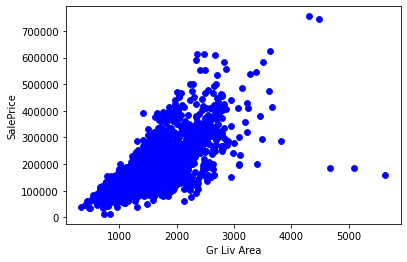

In [36]:
#plotting "Gr Liv Area" and "SalePrice" columns

plt.scatter(x=dataset['Gr Liv Area'], y=dataset['SalePrice'],
color="blue" , linewidths=0.8);
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice");

Definitely, 5 values are outliers.

In [37]:
outlie_columns = ["Gr Liv Area"] + [col for col in dataset.columns if "Sale" in col]


In [38]:
outlie_columns

['Gr Liv Area', 'Sale Type', 'Sale Condition', 'SalePrice']

In [39]:
dataset[dataset["Gr Liv Area"] > 4000][outlie_columns]

,Gr Liv Area,Sale Type,Sale Condition,SalePrice
1498,5642,New,Partial,160000
1760,4476,WD,Abnorml,745000
1767,4316,WD,Normal,755000
2180,5095,New,Partial,183850
2181,4676,New,Partial,184750


In [40]:
#removing the outlier
dataset = dataset[dataset["Gr Liv Area"] < 4000]


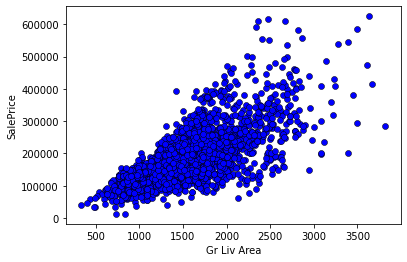

In [41]:
#plotting again to see
plt.scatter(x=dataset['Gr Liv Area'], y=dataset['SalePrice'],
color="blue", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice");

In [42]:
dataset

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00,31770,Pave,No Alley,IR1,Lvl,...,0,No Pool,No Fence,No feature,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00,11622,Pave,No Alley,Reg,Lvl,...,0,No Pool,MnPrv,No feature,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00,14267,Pave,No Alley,IR1,Lvl,...,0,No Pool,No Fence,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00,11160,Pave,No Alley,Reg,Lvl,...,0,No Pool,No Fence,No feature,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00,13830,Pave,No Alley,IR1,Lvl,...,0,No Pool,MnPrv,No feature,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.00,7937,Pave,No Alley,IR1,Lvl,...,0,No Pool,GdPrv,No feature,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,0.00,8885,Pave,No Alley,IR1,Low,...,0,No Pool,MnPrv,No feature,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.00,10441,Pave,No Alley,Reg,Lvl,...,0,No Pool,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.00,10010,Pave,No Alley,Reg,Lvl,...,0,No Pool,No Fence,No feature,0,4,2006,WD,Normal,170000


In [43]:
#resetting dataset
dataset.reset_index(drop=True, inplace=True)

In [44]:
dataset

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00,31770,Pave,No Alley,IR1,Lvl,...,0,No Pool,No Fence,No feature,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00,11622,Pave,No Alley,Reg,Lvl,...,0,No Pool,MnPrv,No feature,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00,14267,Pave,No Alley,IR1,Lvl,...,0,No Pool,No Fence,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00,11160,Pave,No Alley,Reg,Lvl,...,0,No Pool,No Fence,No feature,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00,13830,Pave,No Alley,IR1,Lvl,...,0,No Pool,MnPrv,No feature,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,2926,923275080,80,RL,37.00,7937,Pave,No Alley,IR1,Lvl,...,0,No Pool,GdPrv,No feature,0,3,2006,WD,Normal,142500
2921,2927,923276100,20,RL,0.00,8885,Pave,No Alley,IR1,Low,...,0,No Pool,MnPrv,No feature,0,6,2006,WD,Normal,131000
2922,2928,923400125,85,RL,62.00,10441,Pave,No Alley,Reg,Lvl,...,0,No Pool,MnPrv,Shed,700,7,2006,WD,Normal,132000
2923,2929,924100070,20,RL,77.00,10010,Pave,No Alley,Reg,Lvl,...,0,No Pool,No Fence,No feature,0,4,2006,WD,Normal,170000


In [45]:
#Filtering our columns not important
dataset.drop(['Order', 'PID'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [46]:
dataset

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.00,31770,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,No feature,0,5,2010,WD,Normal,215000
1,20,RH,80.00,11622,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,No Pool,MnPrv,No feature,0,6,2010,WD,Normal,105000
2,20,RL,81.00,14267,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.00,11160,Pave,No Alley,Reg,Lvl,AllPub,Corner,...,0,No Pool,No Fence,No feature,0,4,2010,WD,Normal,244000
4,60,RL,74.00,13830,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,0,No Pool,MnPrv,No feature,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,RL,37.00,7937,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,...,0,No Pool,GdPrv,No feature,0,3,2006,WD,Normal,142500
2921,20,RL,0.00,8885,Pave,No Alley,IR1,Low,AllPub,Inside,...,0,No Pool,MnPrv,No feature,0,6,2006,WD,Normal,131000
2922,85,RL,62.00,10441,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,No Pool,MnPrv,Shed,700,7,2006,WD,Normal,132000
2923,20,RL,77.00,10010,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,No feature,0,4,2006,WD,Normal,170000


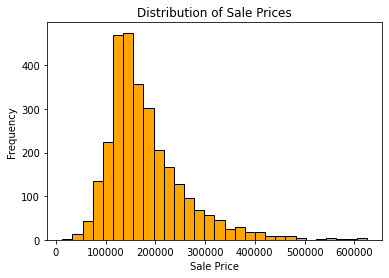

In [47]:
# Plot the distribution of Sale Prices
plt.hist(dataset['SalePrice'], bins=30, color='orange', edgecolor='black')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Prices')
plt.show()

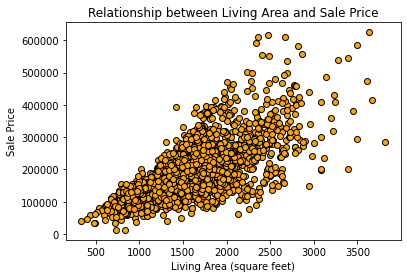

In [48]:
# Plot the relationship between Living Area and Sale Price
plt.scatter(dataset['Gr Liv Area'], dataset['SalePrice'], color='orange', edgecolor='black')
plt.xlabel('Living Area (square feet)')
plt.ylabel('Sale Price')
plt.title('Relationship between Living Area and Sale Price')
plt.show()

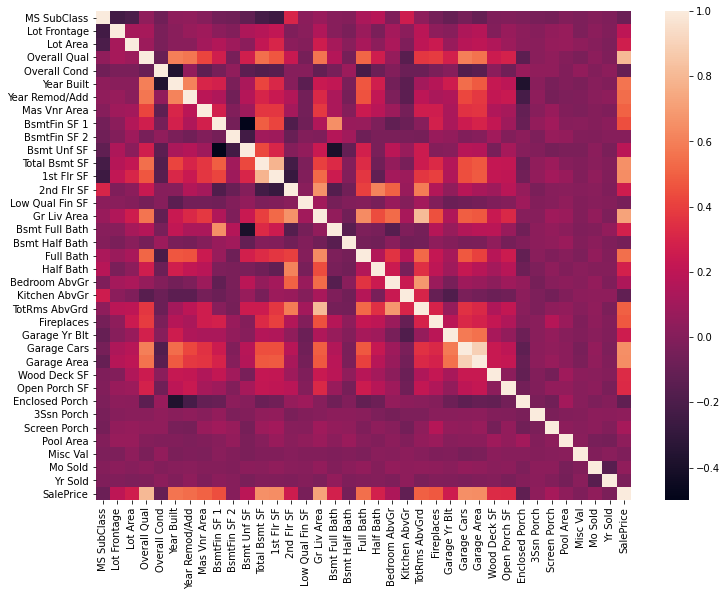

In [49]:
#plotting a correlation map to see if the columns are corellated or not
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(dataset.corr(), ax=ax);

There exist lots of positive and negative correlation. However, looking at the last row of the heatmap which is the target variable, it is highly positively correlated with Overall Qual and Gr Liv Area. It is also  positively correlated with Year Built, Year Remod/Add, Mas Vnr Area, Total Bsmt
SF, 1st Flr SF, Full Bath, Garage Cars, and Garage Area.

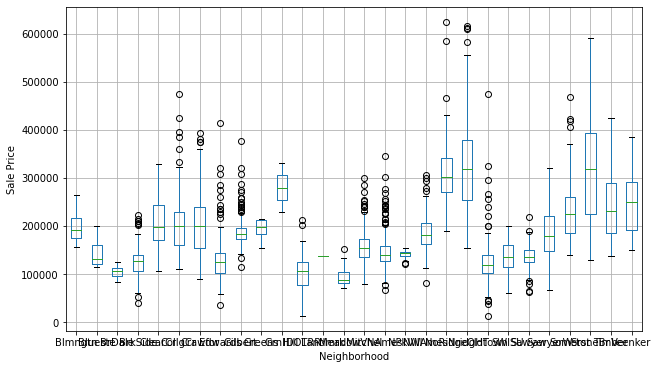

In [50]:
# Plot a box plot of Sale Price by Neighborhood
dataset.boxplot(column='SalePrice', by='Neighborhood', figsize=(10, 6))
plt.title('')  # Remove title
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.suptitle('')  # Remove supertitle
plt.show()


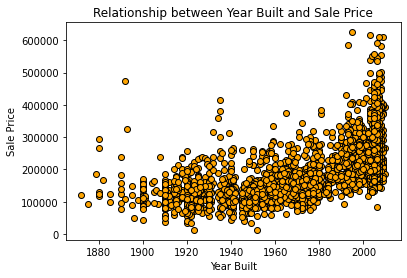

In [51]:
# Plot the relationship between Year Built and Sale Price
plt.scatter(dataset['Year Built'], dataset['SalePrice'], color='orange', edgecolor='black')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.title('Relationship between Year Built and Sale Price')
plt.show()

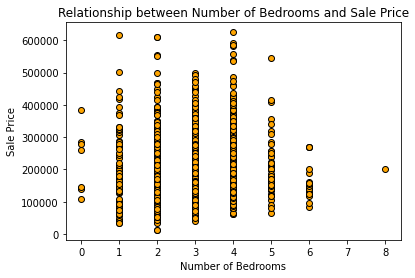

In [52]:
# Plot the relationship between Number of Bedrooms and Sale Price
plt.scatter(dataset['Bedroom AbvGr'], dataset['SalePrice'], color='orange', edgecolor='black')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sale Price')
plt.title('Relationship between Number of Bedrooms and Sale Price')
plt.show()

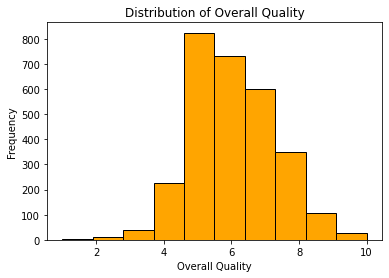

In [53]:
# Plot the distribution of Overall Quality
plt.hist(dataset['Overall Qual'], bins=10, color='orange', edgecolor='black')
plt.xlabel('Overall Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Quality')
plt.show()

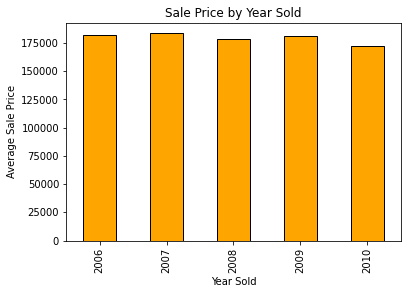

In [54]:
# Plot a bar plot of Sale Price by Year Sold
sale_price_by_year = dataset.groupby('Yr Sold')['SalePrice'].mean()
sale_price_by_year.plot.bar(color='orange', edgecolor='black')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.title('Sale Price by Year Sold')
plt.show()

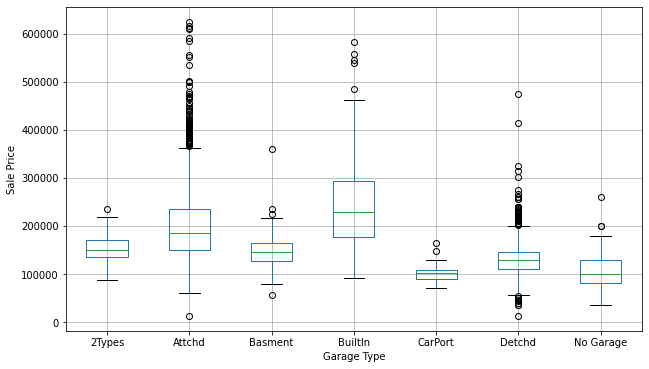

In [55]:
# Plot a box plot of Sale Price by Garage Type
dataset.boxplot(column='SalePrice', by='Garage Type', figsize=(10, 6))
plt.title('')  # Remove title
plt.xlabel('Garage Type')
plt.ylabel('Sale Price')
plt.suptitle('')  # Remove supertitle
plt.show()



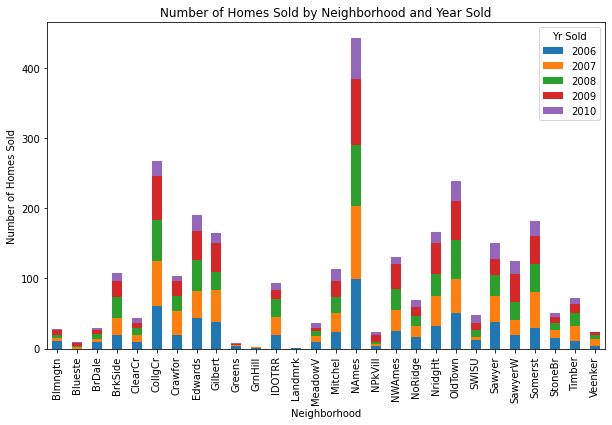

In [56]:
# Plot a stacked bar plot of the number of homes sold by neighborhood and year sold
homes_sold_by_neighborhood_and_year = dataset.groupby(['Neighborhood', 'Yr Sold'])['SalePrice'].count().unstack()
homes_sold_by_neighborhood_and_year.plot.bar(stacked=True, figsize=(10, 6))
plt.xlabel('Neighborhood')
plt.ylabel('Number of Homes Sold')
plt.title('Number of Homes Sold by Neighborhood and Year Sold')
plt.show()




/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


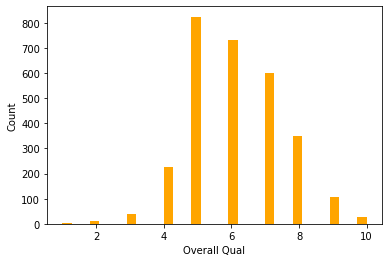

In [57]:
#plotting the 'Overall Qual' column:
sns.distplot(dataset['Overall Qual'], kde=False,
color="orange", hist_kws={"alpha": 1});
plt.ylabel("Count");

We see that Overall Qual takes an integer value between 1 and 10, and that most houses have
an overall quality between 5 and 7. Now we plot the scatter plot of SalePrice and Overall Qual
to see the relationship between them:

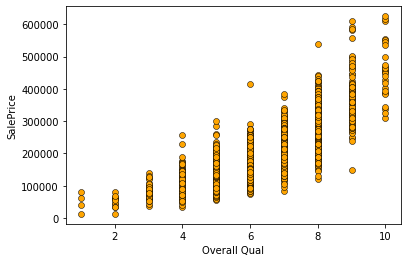

In [58]:
plt.scatter(x=dataset['Overall Qual'], y=dataset['SalePrice'],
color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Overall Qual"); plt.ylabel("SalePrice");

This shows that as prices increase, quality also increase.

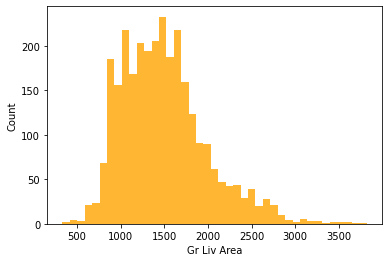

In [59]:

#plotting the dictribution of 'Gr Liv Area'
sns.distplot(dataset['Gr Liv Area'], kde=False,
color="orange", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

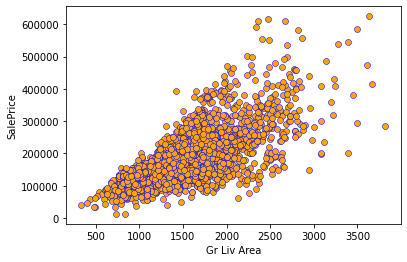

In [60]:
#plotting the relationship between the target column and 'Gr Liv Area'
plt.scatter(x=dataset['Gr Liv Area'], y=dataset['SalePrice'],
color="orange", edgecolors="blue", linewidths=0.5);
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice");

This shows that as as the living area increases, the price also goes up.

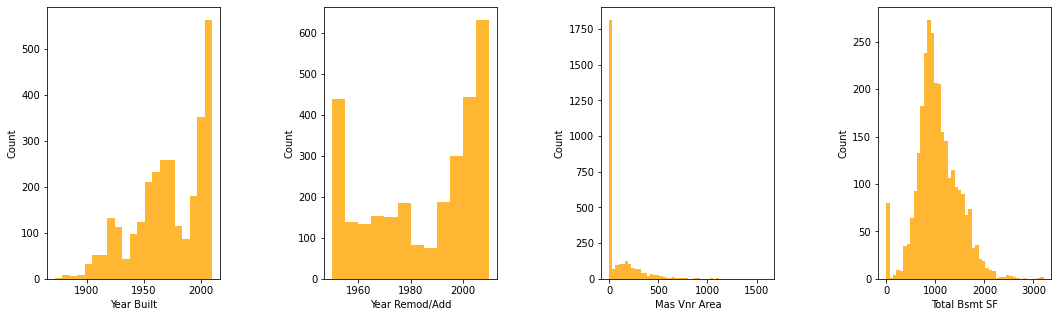

In [61]:
#plotting columns that are correlated with the target column
fig, axes = plt.subplots(1, 4, figsize=(18,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["Year Built", "Year Remod/Add",
"Mas Vnr Area", "Total Bsmt SF"]):
    sns.distplot(dataset[v], kde=False, color="orange",hist_kws={"alpha": 0.8}, ax=ax)
    ax.set(ylabel="Count");

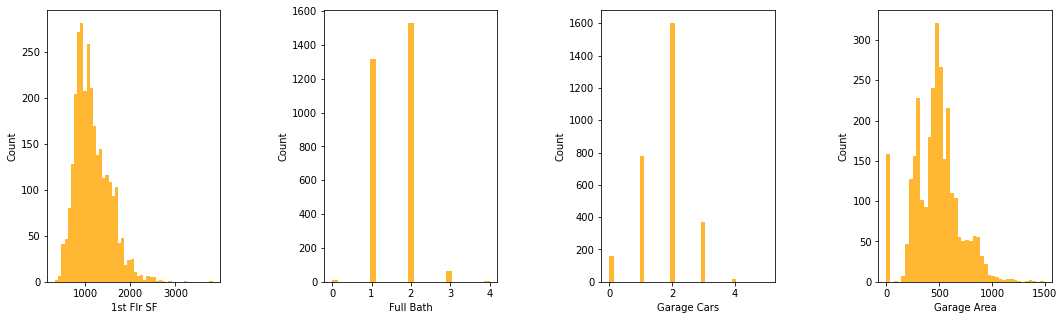

In [62]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["1st Flr SF", "Full Bath",
"Garage Cars", "Garage Area"]):
    sns.distplot(dataset[v], kde=False, color="orange",hist_kws={"alpha": 0.8}, ax=ax);
    ax.set(ylabel="Count");

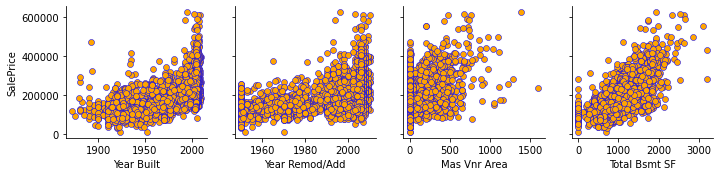

In [63]:
#Now let us see their relationships with the target variable using scatter plots:
x_vars = ["Year Built", "Year Remod/Add", "Mas Vnr Area", "Total Bsmt SF"]
g = sns.PairGrid(dataset, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="orange", edgecolors="blue", linewidths=0.5);

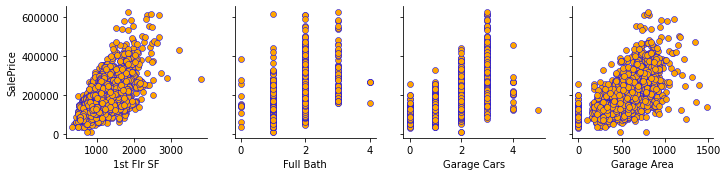

In [64]:
x_vars = ["1st Flr SF", "Full Bath", "Garage Cars", "Garage Area"]
g = sns.PairGrid(dataset, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="orange", edgecolors="blue", linewidths=0.5);

## Relationships Between Predictor Variables

From the heatmap, there are other columns that are positively and negatively correltated.

### Positive Correlation 


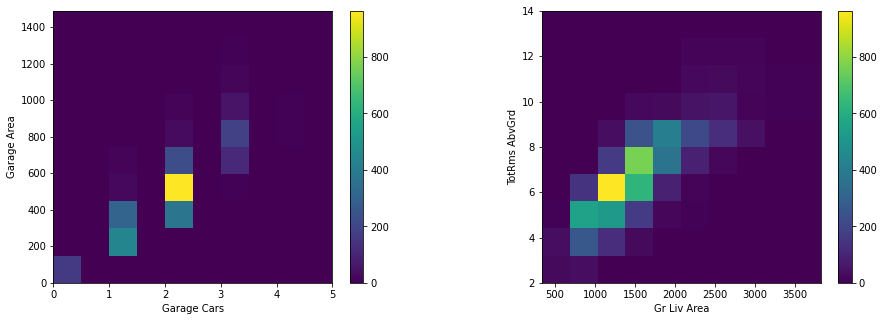

In [65]:
plt.rc("grid", linewidth=0.05)
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
h1 = axes[0].hist2d(dataset["Garage Cars"],
dataset["Garage Area"],
cmap="viridis");
axes[0].set(xlabel="Garage Cars", ylabel="Garage Area")
plt.colorbar(h1[3], ax=axes[0]);
h2 = axes[1].hist2d(dataset["Gr Liv Area"],
dataset["TotRms AbvGrd"],
cmap="viridis");
axes[1].set(xlabel="Gr Liv Area", ylabel="TotRms AbvGrd")
plt.colorbar(h1[3], ax=axes[1]);
plt.rc("grid", linewidth=0.25)

We can see the strong correlation between each pair. For Garage Cars and Garage Area, we
see that the highest concentration of data is when Garage Cars is 2 and Garage Area is approximately between 450 and 600 ft2. For Gr Liv Area and TotRms AbvGrd, we notice that the highest
concentration is when Garage Liv Area is roughly between 800 and 2000 ft2 and TotRms AbvGrd
is 6.

### Negative Correlation

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Count')]

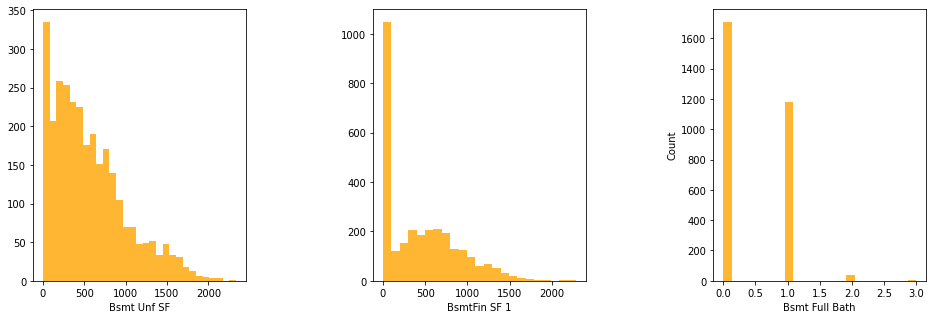

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["Bsmt Unf SF", "BsmtFin SF 1", "Bsmt Full Bath"]):
    sns.distplot(dataset[v], kde=False, color="orange",hist_kws={"alpha": 0.8}, ax=ax);
ax.set(ylabel="Count")

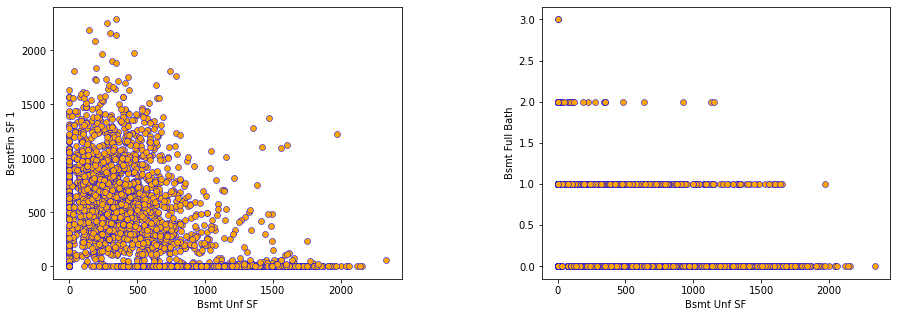

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
axes[0].scatter(dataset["Bsmt Unf SF"], dataset["BsmtFin SF 1"],
color="orange", edgecolors="blue", linewidths=0.5);
axes[0].set(xlabel="Bsmt Unf SF", ylabel="BsmtFin SF 1");
axes[1].scatter(dataset["Bsmt Unf SF"], dataset["Bsmt Full Bath"],
color="orange", edgecolors="blue", linewidths=0.5);
axes[1].set(xlabel="Bsmt Unf SF", ylabel="Bsmt Full Bath");

From the plots, we can see the negative correlation between each pair of these variables.

### Feature Engineering

#### Creating New Derived Features

There exist a high positive correlation between the target variable SalePrice and each of
Overall Qual and Gr Liv Area which indicates that they are important in prediction of our target column. So we create polynomial features out of these features:
For each one of these features, we will derive a feature whose values are the squares of original
values, and another feature whose values are the cubes of original values. Also, we will
create a feature whose values are the product of our two features values:

A low Mean Squared Error (MSE) and a high R^2 score indicate that the model is making accurate predictions, but it depends on the context of your problem.

In general, a low MSE means that the difference between the predicted values and actual values is small, indicating a good fit of the model to the data. The R^2 score indicates the proportion of the variance in the target variable that can be explained by the features in the model. A high R^2 score of 0.93 suggests that 93% of the variance in the target variable can be explained by the features in the model.

However, in absolute terms, the interpretation of a good MSE or R^2 score depends on the scale of the target variable and the problem you are trying to solve. In some cases, an MSE of 0.06 and an R^2 score of 0.93 might be considered excellent, while in other cases, it might be considered poor.

Therefore, it's essential to compare the results of your model with the baseline or other models to determine if the model is making accurate predictions or not.




Regenerate response

In [68]:
for f in ["Overall Qual", "Gr Liv Area"]:
    dataset[f + "_p2"] = dataset[f] ** 2
    dataset[f + "_p3"] = dataset[f] ** 3
dataset["OverallQual_GrLivArea"] = dataset["Overall Qual"] * dataset["Gr Liv Area"]

<ipython-input-68-c7c53cc717c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[f + "_p2"] = dataset[f] ** 2
<ipython-input-68-c7c53cc717c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[f + "_p3"] = dataset[f] ** 3
<ipython-input-68-c7c53cc717c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [69]:
dataset

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Overall Qual_p2,Overall Qual_p3,Gr Liv Area_p2,Gr Liv Area_p3,OverallQual_GrLivArea
0,20,RL,141.00,31770,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,5,2010,WD,Normal,215000,36,216,2742336,4541308416,9936
1,20,RH,80.00,11622,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,6,2010,WD,Normal,105000,25,125,802816,719323136,4480
2,20,RL,81.00,14267,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,6,2010,WD,Normal,172000,36,216,1766241,2347334289,7974
3,20,RL,93.00,11160,Pave,No Alley,Reg,Lvl,AllPub,Corner,...,4,2010,WD,Normal,244000,49,343,4452100,9393931000,14770
4,60,RL,74.00,13830,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,3,2010,WD,Normal,189900,25,125,2653641,4322781189,8145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,RL,37.00,7937,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,...,3,2006,WD,Normal,142500,36,216,1006009,1009027027,6018
2921,20,RL,0.00,8885,Pave,No Alley,IR1,Low,AllPub,Inside,...,6,2006,WD,Normal,131000,25,125,813604,733870808,4510
2922,85,RL,62.00,10441,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,7,2006,WD,Normal,132000,25,125,940900,912673000,4850
2923,20,RL,77.00,10010,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,4,2006,WD,Normal,170000,25,125,1929321,2679826869,6945


Also, we noticed that there are some predictor features that are highly correlated with each
other. To avoid the Multicollinearity problem, we will delete one feature from each pair of highly
correlated predictors. We have two pairs: the first consists of Garage Cars and Garage Area, and
the other consists of Gr Liv Area and TotRms AbvGrd. For the first pair, we will remove Garage
Cars feature; from the second pair, we will remove TotRms AbvGrd feature:

In [70]:
dataset.drop(["Garage Cars", "TotRms AbvGrd"], axis=1, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Dealing with Ordinal Variables

There are some ordinal features in our dataset. For example, the Bsmt Cond feature has the following possible values:


In [71]:
print("Unique values in 'Bsmt Cond' column:")
print(dataset['Bsmt Cond'].unique().tolist())

Unique values in 'Bsmt Cond' column:
['Gd', 'TA', 'No Basement', 'Po', 'Fa', 'Ex']


Where “Gd” means “Good”, “TA” means “Typical”, “Po” means “Poor”, “Fa” means “Fair”,
and “Ex” means “Excellent” according to the dataset documentation. But the problem is that
machine learning models will not know that this feature represents a ranking; it will be treated as
other categorical features. So to solve this issue, we will map each one of the possible values of
this feature to a number. We will map "No Basement" to 0, "Po" to 1, "Fa" to 2, "TA" to 3, "Gd" to
4, and "Ex" to 5.
The ordinal features in the dataset are: Exter Qual, Exter Cond, Bsmt Qual, Bsmt Cond,
Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2, Heating QC, Central Air, Kitchen Qual,
Functional, Fireplace Qu, GarageFinish, Garage Qual, Garage Cond, Pool QC, Land Slope
and Fence. We will map the values of each of them to corresponding numbers as described for
Bsmt Cond above and in accordance with the dataset documentation:

In [72]:
mp = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
dataset['Exter Qual'] = dataset['Exter Qual'].map(mp)
dataset['Exter Cond'] = dataset['Exter Cond'].map(mp)
dataset['Heating QC'] = dataset['Heating QC'].map(mp)
dataset['Kitchen Qual'] = dataset['Kitchen Qual'].map(mp)
mp = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0}
dataset['Bsmt Qual'] = dataset['Bsmt Qual'].map(mp)
dataset['Bsmt Cond'] = dataset['Bsmt Cond'].map(mp)
dataset['Bsmt Exposure'] = dataset['Bsmt Exposure'].map(
{'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})
mp = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0}
dataset['BsmtFin Type 1'] = dataset['BsmtFin Type 1'].map(mp)
dataset['BsmtFin Type 2'] = dataset['BsmtFin Type 2'].map(mp)
dataset['Central Air'] = dataset['Central Air'].map({'Y':1,'N':0})

<ipython-input-72-b585e3a27714>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Exter Qual'] = dataset['Exter Qual'].map(mp)
<ipython-input-72-b585e3a27714>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Exter Cond'] = dataset['Exter Cond'].map(mp)
<ipython-input-72-b585e3a27714>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [73]:
dataset

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Overall Qual_p2,Overall Qual_p3,Gr Liv Area_p2,Gr Liv Area_p3,OverallQual_GrLivArea
0,20,RL,141.00,31770,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,5,2010,WD,Normal,215000,36,216,2742336,4541308416,9936
1,20,RH,80.00,11622,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,6,2010,WD,Normal,105000,25,125,802816,719323136,4480
2,20,RL,81.00,14267,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,6,2010,WD,Normal,172000,36,216,1766241,2347334289,7974
3,20,RL,93.00,11160,Pave,No Alley,Reg,Lvl,AllPub,Corner,...,4,2010,WD,Normal,244000,49,343,4452100,9393931000,14770
4,60,RL,74.00,13830,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,3,2010,WD,Normal,189900,25,125,2653641,4322781189,8145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,RL,37.00,7937,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,...,3,2006,WD,Normal,142500,36,216,1006009,1009027027,6018
2921,20,RL,0.00,8885,Pave,No Alley,IR1,Low,AllPub,Inside,...,6,2006,WD,Normal,131000,25,125,813604,733870808,4510
2922,85,RL,62.00,10441,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,7,2006,WD,Normal,132000,25,125,940900,912673000,4850
2923,20,RL,77.00,10010,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,4,2006,WD,Normal,170000,25,125,1929321,2679826869,6945


In [74]:
dataset['Central Air']

0       1
1       1
2       1
3       1
4       1
       ..
2920    1
2921    1
2922    1
2923    1
2924    1
Name: Central Air, Length: 2925, dtype: int64

In [75]:
dataset['Functional'] = dataset['Functional'].map(
{'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,
'Maj2':2,'Sev':1,'Sal':0})
dataset['Fireplace Qu'] = dataset['Fireplace Qu'].map(
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})
dataset['Garage Finish'] = dataset['Garage Finish'].map(
{'Fin':3,'RFn':2,'Unf':1,'No Garage':0})
dataset['Garage Qual'] = dataset['Garage Qual'].map(
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
dataset['Garage Cond'] = dataset['Garage Cond'].map(
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
dataset['Pool QC'] = dataset['Pool QC'].map(
{'Ex':4,'Gd':3,'TA':2,'Fa':1,'No Pool':0})
dataset['Land Slope'] = dataset['Land Slope'].map(
{'Sev': 2, 'Mod': 1, 'Gtl': 0})
dataset['Fence'] = dataset['Fence'].map(
{'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'No Fence':0})

<ipython-input-75-50b2d0d79e88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Functional'] = dataset['Functional'].map(
<ipython-input-75-50b2d0d79e88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Fireplace Qu'] = dataset['Fireplace Qu'].map(
<ipython-input-75-50b2d0d79e88>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

 ### One-Hot Encoding For Categorical Features

Our dataset contains some categorical columns. However, machine learning models accept only 0s and 1s and 
so we would have to encode our dataset to be accpetable for our machine learning model

For the Paved Drive column  which indicates how the driveway is paved. It has three possible values: Y which means for “Paved”, P
which means “Partial Pavement”, and N which means “Dirt/Gravel”, we then perform one-hot encoding as follows:

In [76]:
dataset = pd.get_dummies(dataset)

In [77]:
pavedDrive_oneHot = [c for c in dataset.columns if c.startswith("Paved")]
dataset[pavedDrive_oneHot].head()

,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [78]:
dataset

,MS SubClass,Lot Frontage,Lot Area,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,141.00,31770,0,6,5,1960,1960,112.00,2,...,0,0,0,1,0,0,0,0,1,0
1,20,80.00,11622,0,5,6,1961,1961,0.00,2,...,0,0,0,1,0,0,0,0,1,0
2,20,81.00,14267,0,6,6,1958,1958,108.00,2,...,0,0,0,1,0,0,0,0,1,0
3,20,93.00,11160,0,7,5,1968,1968,0.00,3,...,0,0,0,1,0,0,0,0,1,0
4,60,74.00,13830,0,5,5,1997,1998,0.00,2,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,37.00,7937,0,6,6,1984,1984,0.00,2,...,0,0,0,1,0,0,0,0,1,0
2921,20,0.00,8885,1,5,5,1983,1983,0.00,2,...,0,0,0,1,0,0,0,0,1,0
2922,85,62.00,10441,0,5,5,1992,1992,0.00,2,...,0,0,0,1,0,0,0,0,1,0
2923,20,77.00,10010,1,5,5,1974,1975,0.00,2,...,0,0,0,1,0,0,0,0,1,0


## Choosing the Machine learning model to use

Looking at the target column which is what we want
to predict is a continuous value and so the prediction type that is appropriate to our problem is regression.

## Scaling the dataset

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()
# fitting the scaler to our data before transformation
dataset.loc[:, dataset.columns != 'SalePrice'] = scaler.fit_transform(dataset.loc[:, dataset.columns != 'SalePrice'])

## Splitting the Dataset into Train and Test

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('SalePrice', axis=1), dataset[['SalePrice']],
                                                    test_size=0.25, random_state=3)

## Searching for Effective Parameters

### Models

#### Linear Regression using Ridge Regression

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [96]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


In [85]:
Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True,max_iter=None, tol=0.001, solver='auto', random_state=None)

Using GridSearchCV() to search for the best model parameters in a parameter
space.

In [97]:
parameter_space = {
"alpha": [1, 10, 100, 290, 500],
"fit_intercept": [True, False],
"solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}
clf = GridSearchCV(Ridge(random_state=3), parameter_space, n_jobs=4, cv=3, scoring="neg_mean_absolute_error")
clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 290, 'fit_intercept': True, 'solver': 'cholesky'}


Building our Ridge model with the best parameters found

In [98]:
ridge_model = Ridge(random_state=3, **clf.best_params_)

In [99]:
#training our model with our dataset
ridge_model.fit(X_train, y_train);

In [100]:
#testing our model and evaluating our predictions

from sklearn.metrics import mean_absolute_error
y_pred = ridge_model.predict(X_test)
ridge_mae = mean_absolute_error(y_test, y_pred)
print("Ridge MAE =", ridge_mae)

Ridge MAE = 15270.463549642727


In [101]:
ridge_mape = mean_absolute_percentage_error(y_test, y_pred)

In [102]:
ridge_mape

0.08927896889542038

#### Nearest Neighbors

In [103]:
from sklearn.neighbors import KNeighborsRegressor

In [105]:
#KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto',leaf_size=30, p=2, metric='minkowski', metric_params=None,n_jobs=None, **kwargs)

In [106]:
parameter_space = {
"n_neighbors": [5, 10, 15, 20, 45],
"weights": ["uniform", "distance"],
"algorithm": ["ball_tree", "kd_tree", "brute"],
"leaf_size": [1,2,10,40,250]
}
clf = GridSearchCV(KNeighborsRegressor(), parameter_space, cv=3,
scoring="neg_mean_absolute_error", n_jobs=4)
clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 10, 'weights': 'distance'}


We defined the parameter space above using reasonable values for chosen parameters. Then
we used GridSearchCV() with 3 folds (cv=3). Now we build our Ridge model with the best
parameters found:

In [107]:
#Training our model
knn_model = KNeighborsRegressor(**clf.best_params_)
knn_model.fit(X_train, y_train);

In [108]:
#Testing and evaluating our model
y_pred = knn_model.predict(X_test)
knn_mae = mean_absolute_error(y_test, y_pred)
print("K-Nearest Neighbors MAE =", knn_mae)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


K-Nearest Neighbors MAE = 22780.14347886256


In [110]:
knn_mape = mean_absolute_percentage_error(y_test, y_pred)
knn_mape

0.1319205726157031

In [86]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the processed dataset
X = pd.read_csv("ames_housing_processed.csv")
y = pd.read_csv("ames_housing_target.csv")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = knn.predict(X_test)

# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.08412238470831132
R^2 Score: 0.904200147190628


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


#### Support Vector Regression

In [111]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

In [112]:
#SVR(kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)

In [113]:
parameter_space = {
"kernel": ["poly", "linear", "rbf", "sigmoid"],
"degree": [3, 5],
"coef0": [0, 3, 7],
"gamma":[1e-3, 1e-1, 1/X_train.shape[1]],
"C": [1, 10, 100],
}
clf = GridSearchCV(SVR(), parameter_space, cv=3, n_jobs=4,
scoring="neg_mean_absolute_error")
clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters:
{'C': 100, 'coef0': 3, 'degree': 5, 'gamma': 0.004132231404958678, 'kernel': 'poly'}


We defined the parameter space above using reasonable values for chosen parameters. Then
we used GridSearchCV() with 3 folds (cv=3). Now we build our Support Vector Regression model
with the best parameters found:

In [114]:
svr_model = SVR(**clf.best_params_)

In [115]:
#training our model with X_train and y_train
svr_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, coef0=3, degree=5, gamma=0.004132231404958678, kernel='poly')

In [116]:
#testing our model
y_pred = svr_model.predict(X_test)
svr_mae = mean_absolute_error(y_test, y_pred)
print("Support Vector Regression MAE =", svr_mae)

Support Vector Regression MAE = 12874.927869502724


In [117]:
svr_mape = mean_absolute_percentage_error(y_test, y_pred)
svr_mape

0.07443617438809758

In [87]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the processed dataset
X = pd.read_csv("ames_housing_processed.csv")
y = pd.read_csv("ames_housing_target.csv")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the SVR model
svr = SVR(kernel='linear').fit(X_train, y_train.values.ravel())

# Predict the target variable on the test set
y_pred = svr.predict(X_test)

# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.05462090261863427
R^2 Score: 0.9377968842737382


In the above code, kernel is the type of kernel to use in the SVR model. In this example, a linear kernel is used, but you can experiment with other types of kernels, such as polynomial or radial basis function (RBF) to see how it affects the performance of the model.

#### Decision Tree

In [118]:
from sklearn.tree import DecisionTreeRegressor

In [119]:
DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1,
min_weight_fraction_leaf=0.0, max_features=None,
random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0)

DecisionTreeRegressor(criterion='mse')

In [120]:
parameter_space = \
{
"criterion": ["mse", "friedman_mse", "mae"],
"min_samples_split": [5, 18, 29, 50],
"min_samples_leaf": [3, 7, 15, 25],
"max_features": [20, 50, 150, 200, X_train.shape[1]]}

In [121]:
clf = GridSearchCV(DecisionTreeRegressor(random_state=3), parameter_space,
cv=3, scoring="neg_mean_absolute_error", n_jobs=4)
clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'criterion': 'mse', 'max_features': 242, 'min_samples_leaf': 7, 'min_samples_split': 18}


/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [122]:
dt_model = DecisionTreeRegressor(**clf.best_params_)

In [123]:
#training our model
dt_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', max_features=242, min_samples_leaf=7,
                      min_samples_split=18)

In [124]:
#testing and evaluating our model
y_pred = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, y_pred)
print("Decision Tree MAE =", dt_mae)

Decision Tree MAE = 20873.949425979506


In [125]:
dt_mape = mean_absolute_percentage_error(y_test, y_pred)
dt_mape

0.11967872485159801

#### Random Forest

In [134]:
from sklearn.ensemble import RandomForestRegressor

In [135]:
RandomForestRegressor(n_estimators=100, criterion= 'mse', max_depth=None,
min_samples_split=2, min_samples_leaf=1,
min_weight_fraction_leaf=0.0, max_features= 'auto',
max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False,
n_jobs=None, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(criterion='mse')

In [136]:
parameter_space = {
"n_estimators": [10, 100, 300, 600],
"criterion": ["mse", "mae"],
"max_depth": [7, 50, 254],
"min_samples_split": [2, 5],
"min_samples_leaf": [1, 5],
"max_features": [19, 100, X_train.shape[1]],
"bootstrap": [True, False],
}
clf = RandomizedSearchCV(RandomForestRegressor(random_state=3),
parameter_space, cv=3, n_jobs=4,
scoring="neg_mean_absolute_error",
n_iter=10, random_state=3)
clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Best parameters:
{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 19, 'max_depth': 254, 'criterion': 'mse', 'bootstrap': False}


In [137]:
rf_model = RandomForestRegressor(**clf.best_params_)

In [138]:
#training our model
rf_model.fit(X_train, y_train);

<ipython-input-138-93edf1d70a62>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train);
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [139]:
y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_pred)
print("Random Forest MAE =", rf_mae)

Random Forest MAE = 14360.601599119611


In [140]:
rf_mape = mean_absolute_percentage_error(y_test, y_pred)
rf_mape

0.08348499860148714

####  Neural Network

In [141]:
from sklearn.neural_network import MLPRegressor

In [142]:
parameter_space = {
"hidden_layer_sizes": [(7,)*3, (19,), (100,), (154,)],
"activation": ["identity", "logistic", "tanh", "relu"],
"solver": ["lbfgs"],
"alpha": [1, 10, 100],
}
clf = GridSearchCV(MLPRegressor(random_state=3), parameter_space,
cv=3, scoring="neg_mean_absolute_error", n_jobs=4)
clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters:
{'activation': 'identity', 'alpha': 10, 'hidden_layer_sizes': (154,), 'solver': 'lbfgs'}


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [143]:
nn_model = MLPRegressor(**clf.best_params_)

In [144]:
#training our model
nn_model.fit(X_train, y_train);

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [145]:
#testing and evaluating our model
y_pred = nn_model.predict(X_test)
nn_mae = mean_absolute_error(y_test, y_pred)
print("Neural Network MAE =", nn_mae)

Neural Network MAE = 15559.133007971657


In [146]:
MLP_mape = mean_absolute_percentage_error(y_test, y_pred)
MLP_mape

0.09291780812758053

#### Comparing our results


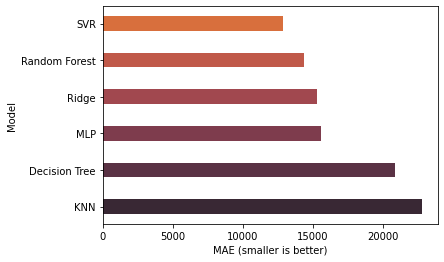

In [152]:
x = ['KNN', 'Decision Tree', 'MLP', 'Ridge', 'Random Forest', 'SVR']
y = [22780.14, 20873.95, 15559.48, 15270.46, 14360.60,
12874.93]
colors = ["#392834", "#5a3244", "#7e3c4d", "#a1484f",
"#c05949", "#d86f3d", "#e88b2b", "#edab06"]
fig, ax = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
ax.set(xlabel="MAE (smaller is better)", ylabel="Model");

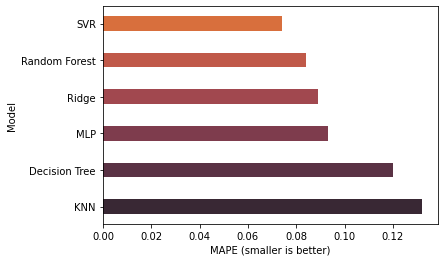

In [153]:
x = ['KNN', 'Decision Tree', 'MLP', 'Ridge', 'Random Forest', 'SVR']
y = [0.132, 0.120, 0.093, 0.089, 0.084, 0.074]
colors = ["#392834", "#5a3244", "#7e3c4d", "#a1484f",
"#c05949", "#d86f3d", "#e88b2b", "#edab06"]
fig, ax = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
ax.set(xlabel="MAPE (smaller is better)", ylabel="Model");